In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle

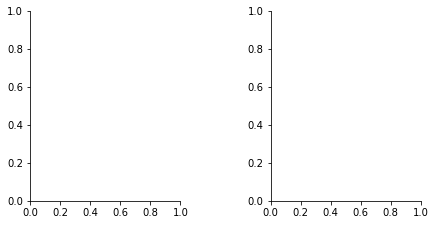

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(7, 3.5), gridspec_kw={'hspace': 0.4, 'wspace': 0.6})
palette = sns.color_palette('Greys', n_colors=2)
plt.rcParams.update({'font.size': 10})
sns.despine(top=True, right=True)

def avg(lst):
    return sum(lst)/len(lst)
    
def create_legend():
    for ax in axs.flat:
        ax.legend([],[], frameon=False)
    lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    fig.legend(lines, labels)

def myplot(kind, axs, title):
    if kind == "lat":
        plot_latency(axs, title)
    if kind == "cpu":
        plot_cpu(axs, title)
    if kind == "goodput":
        plot_goodput(axs, title)
    if kind == "cpg":
        plot_cpu_per_goodput(axs, title)

def plot_latency(axs, title):
    results = []
    for e in pq_100:
      results.append([e, "parquet", "100"])
    for e in pq_10:
      results.append([e, "parquet", "10"])
    for e in pq_1:
      results.append([e, "parquet", "1"])
    for e in rpq_100:
      results.append([e, 'rados-parquet', "100"])
    for e in rpq_10:
      results.append([e, 'rados-parquet', "10"])
    for e in rpq_1:
      results.append([e, 'rados-parquet', "1"])
    df = pd.DataFrame(np.array(results), columns=['Duration (s)', 'File Format', 'Selectivity (%)'])
    df[['Duration (s)']] = df[['Duration (s)']].apply(pd.to_numeric)
    sns_plot = sns.barplot(x="Selectivity (%)", y="Duration (s)", hue="File Format", data=df, ci='sd', capsize=.15, errwidth=0.5, ax=axs, palette=palette)
    sns_plot.set(ylim=(0, 500))
    sns_plot.set_title(title, fontdict= { 'fontsize': 10})
    sns_plot.set_xlabel('Selectivity (%)', fontsize=10)
    sns_plot.set_ylabel('Duration (s)', fontsize=10)
    fig.savefig('lat8and16.png', dpi=600)


def plot_cpu(axs, title):
    results = []
    for e in cpu_pq_100:
      results.append([e, "parquet", "100"])
    for e in cpu_pq_10:
      results.append([e, "parquet", "10"])
    for e in cpu_pq_1:
      results.append([e, "parquet", "1"])
    for e in cpu_rpq_100:
      results.append([e, 'rados-parquet', "100"])
    for e in cpu_rpq_10:
      results.append([e, 'rados-parquet', "10"])
    for e in cpu_rpq_1:
      results.append([e, 'rados-parquet', "1"])
    df = pd.DataFrame(np.array(results), columns=['CPU Usage (%)', 'File Format', 'Selectivity (%)'])
    df[['CPU Usage (%)']] = df[['CPU Usage (%)']].apply(pd.to_numeric)
    sns_plot = sns.barplot(x="Selectivity (%)", y="CPU Usage (%)", hue="File Format", data=df, ax=axs, ci='sd', capsize=.15, errwidth=0.5, palette=palette)
    sns_plot.set(ylim=(0, 350000))
    sns_plot.set_title(title, fontdict= { 'fontsize': 10})
    sns_plot.set_xlabel('Selectivity (%)', fontsize=10)
    sns_plot.set_ylabel('CPU Usage', fontsize=10)
    fig.savefig('cpu8and16.png', dpi=600)


def plot_goodput(axs, title):
    results = []
    for e in pq_100:
      results.append([(154.8/e)*1000, "parquet", "100"])
    for e in pq_10:
      results.append([(15.48/e)*1000, "parquet", "10"])
    for e in pq_1:
      results.append([(1.548/e)*1000, "parquet", "1"])
    for e in rpq_100:
      results.append([(154.8/e)*1000, 'rados-parquet', "100"])
    for e in rpq_10:
      results.append([(15.48/e)*1000, 'rados-parquet', "10"])
    for e in rpq_1:
      results.append([(1.548/e)*1000, 'rados-parquet', "1"])
    df = pd.DataFrame(np.array(results), columns=['Goodput (MB/s)', 'File Format', 'Selectivity (%)'])
    df[['Goodput (MB/s)']] = df[['Goodput (MB/s)']].apply(pd.to_numeric)
    sns_plot = sns.barplot(x="Selectivity (%)", y="Goodput (MB/s)", hue="File Format", ci='sd', capsize=.15, errwidth=0.5, data=df, ax=axs, palette=palette)
    sns_plot.set(ylim=(0, 1000))
    sns_plot.set_xlabel('Selectivity (%)', fontsize=10)
    sns_plot.set_ylabel('Goodput (MB/s)', fontsize=10)
    sns_plot.set_title(title, fontdict= { 'fontsize': 10})
    fig.savefig('goodput_paper.png', dpi=600)


def plot_cpu_per_goodput(axs, title):
    results = []
    for e in pq_100:
      results.append([ avg(cpu_pq_100)/((154.8/e)*1000) , "parquet", "100"])
    for e in pq_10:
      results.append([ avg(cpu_pq_10)/((15.48/e)*1000) , "parquet", "10"])
    for e in pq_1:
      results.append([ avg(cpu_pq_1)/((1.548/e)*1000) , "parquet", "1"])
    for e in rpq_100:
      results.append([ avg(cpu_rpq_100)/((154.8/e)*1000) , 'rados-parquet', "100"])
    for e in rpq_10:
      results.append([ avg(cpu_rpq_10)/((15.48/e)*1000) , 'rados-parquet', "10"])
    for e in rpq_1:
      results.append([ avg(cpu_rpq_1)/((1.548/e)*1000) , 'rados-parquet', "1"])
    df = pd.DataFrame(np.array(results), columns=['CPU/Goodput', 'File Format', 'Selectivity (%)'])
    df[['CPU/Goodput']] = df[['CPU/Goodput']].apply(pd.to_numeric)
    sns_plot = sns.barplot(x="Selectivity (%)", y="CPU/Goodput", hue="File Format", data=df, ci='sd', capsize=.15, errwidth=0.5, ax=axs, palette=palette)
    sns_plot.set(ylim=(0, 40000))
    sns_plot.set_title(title, fontdict= { 'fontsize': 10})
    sns_plot.set_xlabel('Selectivity (%)', fontsize=10)
    sns_plot.set_ylabel('CPU/Goodput', fontsize=10)
    fig.savefig('cpu_per_goodput_paper.png', dpi=600)

In [16]:
rpq_100 = [312.947]
cpu_rpq_100 = [260091.70000000007]

rpq_10 = [255.239]
cpu_rpq_10 = [203864.50000000006]

rpq_1 = [233.053]
cpu_rpq_1 = [191684.80000000005]

pq_100 = [198.47359013557434]
cpu_pq_100 = [163711.39999999988]

pq_10 = [203.067889213562]
cpu_pq_10 = [186856.40000000008]

pq_1 = [196.088] 
cpu_pq_1 = [165839.90000000008]
myplot("lat", axs[0], "8 threads")


pq_100 = [164.4235508441925, 164.21448945999146, 166.64239311218262]
pq_10 = [171.62123465538025, 172.54202485084534]
pq_1 = [166.97980737686157, 166.61639142036438] 

rpq_100 =  [188.38545656204224, 188.29467248916626, 191.61062955856323]
rpq_10 =  [145.5152871608734, 146.13693237304688, 148.84795331954956]
rpq_1 =  [138.43587708473206, 134.47528719902039, 137.60795211791992]

cpu_pq_100 = [259283.69999999998, 256799.59999999995]
cpu_pq_10 = [266312.0, 265786.69999999995]
cpu_pq_1 = [264289.8, 264556.8]

cpu_rpq_100 = [258803.2, 257837.69999999992]
cpu_rpq_10 = [206540.4, 199520.30000000002]
cpu_rpq_1 = [189037.00000000003, 189356.4]
myplot("lat", axs[1], "16 threads")

In [13]:
# 8 threads, 4MB
pq_100 = [59.105]
pq_10 = [56.559]
pq_1 = [54.698]

rpq_100 = [105.258]
rpq_10 = [89.047]
rpq_1 = [85.829]
myplot("lat", axs[0], "4MB , 8 Threads")

# 8 threads, 64MB
pq_100 = [53.206]
pq_10 = [52.912]
pq_1 = [50.996]

rpq_100 = [79.733]
rpq_10 = [63.195]
rpq_1 = [59.754]
myplot("lat", axs[1], "64MB , 8 Threads")